<a href="https://colab.research.google.com/github/IboPMoro/Walmart_Forecast/blob/main/Wallmart_Forecasting_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sección 1: Obtención de datos


In [ ]:
pip install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importación de librerías y del dataset


In [ ]:
import numpy as np #Importacion de la librería Numpy.
import pandas as pd #Importacion de la librería Numpy.
import plotly.express as px #Importacion de la librería Plotly Express.
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt #Importacion de la librería Date Time.
import seaborn as sns #Importación de la libería Seaborn.
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive #Importación de Google Drive.
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Final/Walmart_Store_sales.csv') #Importación del Dataset: Walmart Retail desde Google Drive.
pd.options.display.float_format = '{:,.2f}'.format #Cambiamos el tipo de formato del float ya que trabajamos con números muy grandes.

#Sección 2: Análisis Exploratorio
Descripción del conjunto de datos:
Estos son los datos históricos que abarcan las ventas desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

Store - el número de la tienda
Date - la semana de ventas (los datos se registran el  día viernes)

Weekly_Sales - ventas para la tienda dada

Holiday_Flag: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva

Temperature - Temperatura el día de la venta

Fuel_Price - Costo del combustible en la región

CPI – Índice de precios al consumidor vigente

Unemployment - Tasa de desempleo predominante

Eventos festivos
Super Bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013
Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13
Acción de gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13
Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13

#Exploración y transformación de los datos


In [ ]:
df.head() #Primeros 5 datos.

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010  1,643,690.90             0        42.31        2.57   
1      1  12-02-2010  1,641,957.44             1        38.51        2.55   
2      1  19-02-2010  1,611,968.17             0        39.93        2.51   
3      1  26-02-2010  1,409,727.59             0        46.63        2.56   
4      1  05-03-2010  1,554,806.68             0        46.50        2.62   

     CPI  Unemployment  
0 211.10          8.11  
1 211.24          8.11  
2 211.29          8.11  
3 211.32          8.11  
4 211.35          8.11

In [ ]:
df.tail() #Últimos 5 datos.

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012    713,173.95             0        64.88        4.00   
6431     45  05-10-2012    733,455.07             0        64.89        3.98   
6432     45  12-10-2012    734,464.36             0        54.47        4.00   
6433     45  19-10-2012    718,125.53             0        56.47        3.97   
6434     45  26-10-2012    760,281.43             0        58.85        3.88   

        CPI  Unemployment  
6430 192.01          8.68  
6431 192.17          8.67  
6432 192.33          8.67  
6433 192.33          8.67  
6434 192.31          8.67

In [ ]:
df.shape #Dimensión del dataset.

(6435, 8)

In [ ]:
rows = len(df) #Total de datos que tenemos en el dataset.
columns= len(df.columns)
amount_of_data = rows * columns
amount_of_data

51480

In [ ]:
df.info() #Más información a cerca de los datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.dtypes #Observamos el cambio efectuado.

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
df.isnull().sum() #Hacemos un recuento de nulos en el Dataset.

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.describe() #El método describe() se usa para calcular algunos datos estadísticos como el percentil, la media y el estándar de los valores numéricos de la serie o el marco de datos.

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price      CPI  \
count 6,435.00      6,435.00      6,435.00     6,435.00    6,435.00 6,435.00   
mean     23.00  1,046,964.88          0.07        60.66        3.36   171.58   
std      12.99    564,366.62          0.26        18.44        0.46    39.36   
min       1.00    209,986.25          0.00        -2.06        2.47   126.06   
25%      12.00    553,350.10          0.00        47.46        2.93   131.74   
50%      23.00    960,746.04          0.00        62.67        3.44   182.62   
75%      34.00  1,420,158.66          0.00        74.94        3.73   212.74   
max      45.00  3,818,686.45          1.00       100.14        4.47   227.23   

       Unemployment  
count      6,435.00  
mean           8.00  
std            1.88  
min            3.88  
25%            6.89  
50%            7.87  
75%            8.62  
max           14.31

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) #Cambio de tipo de dato de la columna [Date], de 'object' a 'datetime'.

In [ ]:
var1 = df[['Date','Weekly_Sales']].groupby('Date',as_index=False)['Weekly_Sales'].sum().round().sort_values(by='Date',ascending=True)
var1

Date  Weekly_Sales
0   2010-01-10 42,239,876.00
1   2010-02-04 50,423,831.00
2   2010-02-07 48,917,484.00
3   2010-02-19 48,276,994.00
4   2010-02-26 43,968,571.00
..         ...           ...
138 2012-10-08 47,403,451.00
139 2012-10-19 45,122,411.00
140 2012-10-26 45,544,116.00
141 2012-11-05 46,925,879.00
142 2012-12-10 46,128,514.00

[143 rows x 2 columns]

In [ ]:
var2 = var1.describe()
var2

Weekly_Sales
count        143.00
mean  47,113,419.48
std    5,444,206.20
min   39,599,853.00
25%   44,880,587.50
50%   46,243,900.00
75%   47,792,025.00
max   80,931,416.00

In [ ]:
fig = px.line(var1,x='Date',y='Weekly_Sales')
fig2 = px.box(var2,x='Weekly_Sales')
fig.show()
fig2.show()

#Pandas Profiling


In [ ]:
from pandas_profiling import ProfileReport #Instalamos e importamos el pandas_profiling.

In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#¿Qué tienda tiene el máximo y el mínimo de ventas?

In [ ]:
total_sales = df[['Weekly_Sales','Store']].groupby('Store', as_index=False)['Weekly_Sales'].sum().round().sort_values(by='Weekly_Sales',ascending=False) #Utilizamos el Groupby para calcular las tiendas que más vendieron a lo largo de las semanas.
total_sales.head()

Store   Weekly_Sales
19     20 301,397,792.00
3       4 299,543,953.00
13     14 288,999,911.00
12     13 286,517,704.00
1       2 275,382,441.00

In [ ]:
total_sales.tail() #También podemos ver las tiendas que menos vendieron a lo largo de las semanas.

Store  Weekly_Sales
37     38 55,159,626.00
35     36 53,412,215.00
4       5 45,475,689.00
43     44 43,293,088.00
32     33 37,160,222.00

In [ ]:
fig = px.bar(total_sales, y='Weekly_Sales', x='Store',text_auto='.2s',color="Weekly_Sales", #Gráfico de barras de las ventas totales por tienda.
            title="Ventas totales por tienda")
fig.update_xaxes(type='category')
fig.show()

In [ ]:
var_test = df[['Weekly_Sales','Store']].groupby('Store', as_index=False)['Weekly_Sales'].sum().sort_values(by='Weekly_Sales',ascending=False)
var_test.head()

Store   Weekly_Sales
19     20 301,397,792.46
3       4 299,543,953.38
13     14 288,999,911.34
12     13 286,517,703.80
1       2 275,382,440.98

In [ ]:
var_test["Percent_of_Total_Sales"] = (var_test['Weekly_Sales']/var_test['Weekly_Sales'].sum())*100
var_test.head()

Store   Weekly_Sales  Percent_of_Total_Sales
19     20 301,397,792.46                    4.47
3       4 299,543,953.38                    4.45
13     14 288,999,911.34                    4.29
12     13 286,517,703.80                    4.25
1       2 275,382,440.98                    4.09

In [ ]:
var_test['Seller_type']= np.where(var_test['Percent_of_Total_Sales']<=3,'Retailers','Wholesalers')
var_test.head()

Store   Weekly_Sales  Percent_of_Total_Sales  Seller_type
19     20 301,397,792.46                    4.47  Wholesalers
3       4 299,543,953.38                    4.45  Wholesalers
13     14 288,999,911.34                    4.29  Wholesalers
12     13 286,517,703.80                    4.25  Wholesalers
1       2 275,382,440.98                    4.09  Wholesalers

In [ ]:
retailers, wholesalers = var_test[(mask:=var_test['Percent_of_Total_Sales'] <= 3)], var_test[~mask]

In [ ]:
retailers.head()

Store   Weekly_Sales  Percent_of_Total_Sales Seller_type
30     31 199,613,905.50                    2.96   Retailers
22     23 198,750,617.85                    2.95   Retailers
23     24 194,016,021.28                    2.88   Retailers
10     11 193,962,786.80                    2.88   Retailers
27     28 189,263,680.58                    2.81   Retailers

In [ ]:
wholesalers.head()

Store   Weekly_Sales  Percent_of_Total_Sales  Seller_type
19     20 301,397,792.46                    4.47  Wholesalers
3       4 299,543,953.38                    4.45  Wholesalers
13     14 288,999,911.34                    4.29  Wholesalers
12     13 286,517,703.80                    4.25  Wholesalers
1       2 275,382,440.98                    4.09  Wholesalers

In [ ]:
fig1 = px.sunburst(data_frame = var_test,
            path = ['Seller_type','Store'],
            values = 'Weekly_Sales',
            color = 'Percent_of_Total_Sales',
            color_continuous_scale = 'orrd',
            )
fig1.show()

In [ ]:
fig2 = px.sunburst(data_frame = retailers,
            path = ['Seller_type','Store'],
            values = 'Weekly_Sales',
            color = 'Percent_of_Total_Sales',
            color_continuous_scale = 'orrd',
            title ='Stores retailers'
            )
fig2.show()

In [ ]:
fig3 = px.sunburst(data_frame = wholesalers,
            path = ['Seller_type','Store'],
            values = 'Weekly_Sales',
            color = 'Percent_of_Total_Sales',
            color_continuous_scale = 'orrd',
            title ='Stores wholesalers'
            )
fig3.show()

# Qué tienda tiene la desviación estándar máxima, es decir, las ventas varían mucho. Además, averigüe el coeficiente de desviación medio

Calculo de Desviación Estándar

In [ ]:
desviacion_estandar =pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)) # Utilizamos el Groupby para calcular desviaciones estándares máximas de las ventas totales por tienda.
std = desviacion_estandar.rename(columns={'Weekly_Sales':'Standard deviation'})
std.head()

Standard deviation
Store                    
14             317,569.95
10             302,262.06
20             275,900.56
4              266,201.44
13             265,507.00

In [ ]:
std.tail() #También podemos ver las desviaciones estándates mínimas de las ventas totales por tienda.

Standard deviation
Store                    
5               37,737.97
44              24,762.83
33              24,132.93
30              22,809.67
37              21,837.46

In [ ]:
var1 = df.groupby('Store',as_index= False)['Weekly_Sales'].std()
graf1 = var1.rename(columns={'Weekly_Sales':'Standard deviation'})
fig = px.bar(graf1, x="Store", y="Standard deviation",color='Standard deviation',
              title="Desviación estándar de las ventas totales por tienda")  #Gráfico de barras de la desviación estándar de las ventas totales por tienda.
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

Cálculo de Coeficiente de desviación media 

In [ ]:
cv = pd.DataFrame((df.groupby('Store')['Weekly_Sales'].std()/df.groupby('Store')['Weekly_Sales'].mean()*100).sort_values(ascending=False))
cv = cv.rename(columns={'Weekly_Sales':'Mean Deviation Coefficient'})
cv.head()

Mean Deviation Coefficient
Store                            
35                          22.97
7                           19.73
15                          19.34
29                          18.37
23                          17.97

In [ ]:
cv.tail()

Mean Deviation Coefficient
Store                            
31                           9.02
44                           8.18
43                           6.41
30                           5.20
37                           4.21

In [ ]:
cv_comparation['Mean Deviation Coefficient'] = (cv_comparation['Weekly_Sales_std']/cv_comparation['Weekly_Sales_mean'])*100
cv_comparation.head()

Weekly_Sales_std  Weekly_Sales_mean  Mean Deviation Coefficient
Store                                                                 
1            155,980.77       1,555,264.40                       10.03
2            237,683.69       1,925,751.34                       12.34
3             46,319.63         402,704.44                       11.50
4            266,201.44       2,094,712.96                       12.71
5             37,737.97         318,011.81                       11.87

In [ ]:
fig = px.bar(cv_comparation, x=cv_comparation.index, y="Mean Deviation Coefficient",color='Mean Deviation Coefficient',
              title="Desviación estándar de las ventas totales por tienda")  #Gráfico de barras de la desviación estándar de las ventas totales por tienda.
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
coef = cv.rename(columns={'Weekly_Sales':'Mean Deviation Coefficient'})
coef_max = coef.sort_values(by='Mean Deviation Coefficient',ascending=False)
coef_max.head() # Tiendas con mayores Coeficientes de desviación media.

Mean Deviation Coefficient
Store                            
14                     317,569.95
10                     302,262.06
20                     275,900.56
4                      266,201.44
13                     265,507.00

In [ ]:
coef_max.tail() # Tiendas con menores Coeficientes de deviación media.

Mean Deviation Coefficient
Store                            
5                       37,737.97
44                      24,762.83
33                      24,132.93
30                      22,809.67
37                      21,837.46

In [ ]:
fig = px.bar(coef_max,title="Coeficiente de desviación media de las ventas totales por tienda").update_xaxes(categoryorder="total ascending")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()#Gráfico de barras del coeficiente de desviación media de las ventas totales por tienda.

# ¿Qué tienda/s tiene una buena tasa de crecimiento trimestral en el tercer trimestre de 2012?

In [ ]:
Q2_2012 = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
Q3_2012 = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

In [ ]:
growth_rate = ((Q3_2012 - Q2_2012 )/Q2_2012)*100
pd.DataFrame(growth_rate.sort_values(ascending=False).head())

Weekly_Sales
Store              
16            -2.79
7             -3.82
35            -4.66
26            -6.06
39            -6.40

In [ ]:
pd.DataFrame(growth_rate.sort_values(ascending=False).tail())

Weekly_Sales
Store              
5            -12.35
36           -12.52
29           -12.89
45           -13.89
14           -17.55

In [ ]:
fig = px.bar(growth_rate, title="Tasa de crecimiento entre el Q2 Y Q3 del año 2012")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
net_growth = (Q3_2012 - Q2_2012)
fig = px.bar(net_growth, title="Crecimiento neto entre el Q2 Y Q3 del año 2012")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
net = pd.DataFrame(net_growth)
net_sorted = net.sort_values(by='Weekly_Sales',ascending=False)
net_sorted.head()

Weekly_Sales
Store              
16      -184,822.33
7       -291,200.00
44      -302,069.32
33      -335,065.62
35      -501,448.29

In [ ]:
net_sorted.tail()

Weekly_Sales
Store              
13    -2,483,231.20
2     -2,688,256.00
4     -2,732,065.81
20    -2,884,242.51
14    -4,287,338.66

Mayores tasas de crecimiento por tienda entre cada uno de los trimestres, desde 2010 hasta 2012.

In [ ]:
Q1_2010 = df[(df['Date'] >= '2010-01-01') & (df['Date'] <= '2010-03-31')].groupby('Store')['Weekly_Sales'].sum()
Q2_2010 = df[(df['Date'] >= '2010-04-01') & (df['Date'] <= '2010-06-30')].groupby('Store')['Weekly_Sales'].sum()
Q3_2010 = df[(df['Date'] >= '2010-07-01') & (df['Date'] <= '2010-09-30')].groupby('Store')['Weekly_Sales'].sum()
Q4_2010 = df[(df['Date'] >= '2010-10-01') & (df['Date'] <= '2010-12-31')].groupby('Store')['Weekly_Sales'].sum()

In [ ]:
Q1_2011 = df[(df['Date'] >= '2011-01-01') & (df['Date'] <= '2011-03-31')].groupby('Store')['Weekly_Sales'].sum()
Q2_2011 = df[(df['Date'] >= '2011-04-01') & (df['Date'] <= '2011-06-30')].groupby('Store')['Weekly_Sales'].sum()
Q3_2011 = df[(df['Date'] >= '2011-07-01') & (df['Date'] <= '2011-09-30')].groupby('Store')['Weekly_Sales'].sum()
Q4_2011 = df[(df['Date'] >= '2011-10-01') & (df['Date'] <= '2011-12-31')].groupby('Store')['Weekly_Sales'].sum()

In [ ]:
Q1_2012 = df[(df['Date'] >= '2012-01-01') & (df['Date'] <= '2012-03-31')].groupby('Store')['Weekly_Sales'].sum()

In [ ]:
growth_rate_Q2_2010 = ((Q2_2010 - Q1_2010 )/Q1_2010)*100
growth_rate_Q3_2010 = ((Q3_2010 - Q2_2010 )/Q2_2010)*100
growth_rate_Q4_2010 = ((Q4_2010 - Q3_2010 )/Q3_2010)*100
growth_rate_Q1_2011 = ((Q1_2011 - Q4_2010 )/Q4_2010)*100
growth_rate_Q2_2011 = ((Q2_2011 - Q1_2011 )/Q1_2011)*100
growth_rate_Q3_2011 = ((Q3_2011 - Q2_2011 )/Q2_2011)*100
growth_rate_Q4_2011 = ((Q4_2011 - Q3_2011 )/Q3_2011)*100
growth_rate_Q1_2012 = ((Q1_2012 - Q4_2011 )/Q4_2011)*100

In [ ]:
pd.DataFrame(growth_rate_Q2_2010.sort_values(ascending=False).head())

Weekly_Sales
Store              
36            56.12
33            55.72
35            54.03
42            52.41
41            49.45

In [ ]:
fig = px.bar(growth_rate_Q2_2010, title="Tasa de crecimiento entre el Q1 Y Q2 del año 2010")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
pd.DataFrame(growth_rate_Q3_2010.sort_values(ascending=False).head())

Weekly_Sales
Store              
7              5.70
16             3.90
43            -3.67
41            -5.46
26            -6.41

In [ ]:
fig = px.bar(growth_rate_Q3_2010, title="Tasa de crecimiento entre el Q2 Y Q3 del año 2010")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
pd.DataFrame(growth_rate_Q4_2010.sort_values(ascending=False).head())

Weekly_Sales
Store              
29            39.97
15            39.40
45            38.23
10            37.53
23            36.11

In [ ]:
fig = px.bar(growth_rate_Q4_2010, title="Tasa de crecimiento entre el Q4 Y Q3 del año 2010")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
pd.DataFrame(growth_rate_Q1_2011.sort_values(ascending=False).head())

Weekly_Sales
Store              
38            -7.02
44           -13.26
37           -13.45
42           -16.20
7            -18.15

In [ ]:
fig = px.bar(growth_rate_Q1_2011, title="Tasa de crecimiento entre el Q4 del año 2010 Y Q1 del año 2011")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
pd.DataFrame(growth_rate_Q2_2011.sort_values(ascending=False).head())

Weekly_Sales
Store              
18            18.09
14            17.86
29            16.27
41            16.03
17            15.83

In [ ]:
fig = px.bar(growth_rate_Q2_2011, title="Tasa de crecimiento entre el Q1 Y Q2 del año 2011")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
pd.DataFrame(growth_rate_Q3_2011.sort_values(ascending=False).head())

Weekly_Sales
Store              
7             29.23
16            25.04
26            15.04
17            13.62
23            11.61

In [ ]:
fig = px.bar(growth_rate_Q3_2011, title="Tasa de crecimiento entre el Q3 Y Q2 del año 2011")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
pd.DataFrame(growth_rate_Q4_2011.sort_values(ascending=False).head())

Weekly_Sales
Store              
35            13.25
18            10.72
10            10.68
12             9.78
45             9.46

In [ ]:
fig = px.bar(growth_rate_Q4_2011, title="Tasa de crecimiento entre el Q4 Y Q3 del año 2011")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
pd.DataFrame(growth_rate_Q1_2012.sort_values(ascending=False).head())

Weekly_Sales
Store              
38             1.97
44            -3.98
43            -5.49
37            -5.91
30            -7.53

In [ ]:
fig = px.bar(growth_rate_Q1_2012, title="Tasa de crecimiento entre el Q4 del año 2011 Y Q1 del año 2012")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

#Algunas festividades tienen un impacto negativo en las ventas. Averigüe los días festivos que tienen ventas más altas que las ventas medias en temporada no festiva para todas las tiendas juntas

In [ ]:
df_holiday = df.loc[df['Holiday_Flag']==True]
df_holiday['Date'].unique() 

array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_not_holiday = df.loc[df['Holiday_Flag']==False]
df_not_holiday['Date'].nunique() 

133

In [ ]:
holiday_week= {1:'Holiday week', 0:'Non-holiday week'}
df['Holiday_Flag']= df['Holiday_Flag'].map(holiday_week)
df.head()

Store       Date  Weekly_Sales      Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02  1,643,690.90  Non-holiday week        42.31        2.57   
1      1 2010-12-02  1,641,957.44      Holiday week        38.51        2.55   
2      1 2010-02-19  1,611,968.17  Non-holiday week        39.93        2.51   
3      1 2010-02-26  1,409,727.59  Non-holiday week        46.63        2.56   
4      1 2010-05-03  1,554,806.68  Non-holiday week        46.50        2.62   

     CPI  Unemployment  
0 211.10          8.11  
1 211.24          8.11  
2 211.29          8.11  
3 211.32          8.11  
4 211.35          8.11

In [ ]:
holiday_week = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)
holiday_week

Weekly_Sales
Holiday_Flag                     
Non-holiday week 6,231,919,435.55
Holiday week       505,299,551.56

In [ ]:
second_holiday_week = pd.DataFrame(df.groupby('Holiday_Flag')['Weekly_Sales'].mean().to_frame().sort_values(by='Weekly_Sales', ascending=False))
second_holiday_week 

Weekly_Sales
Holiday_Flag                  
Holiday week      1,122,887.89
Non-holiday week  1,041,256.38

In [ ]:
df.loc[(df['Date'] == '12-02-2010')|(df['Date'] == '11-02-2011')|(df['Date'] == '10-02-2012'),'Super_Bowl'] = True
df.loc[(df['Date'] != '12-02-2010')&(df['Date'] != '11-02-2011')&(df['Date'] != '10-02-2012'),'Super_Bowl'] = False

In [ ]:
df.loc[(df['Date'] == '10-09-2010')|(df['Date'] == '09-09-2011')|(df['Date'] == '07-09-2012'),'Labor_Day'] = True
df.loc[(df['Date'] != '10-09-2010')&(df['Date'] != '09-09-2011')&(df['Date'] != '07-09-2012'),'Labor_Day'] = False

In [ ]:
df.loc[(df['Date'] == '26-11-2010')|(df['Date'] == '25-11-2011'),'Thanksgiving'] = True
df.loc[(df['Date'] != '26-11-2010')&(df['Date'] != '25-11-2011'),'Thanksgiving'] = False

In [ ]:
df.loc[(df['Date'] == '31-12-2010')|(df['Date'] == '30-12-2011'),'Christmas'] = True
df.loc[(df['Date'] != '31-12-2010')&(df['Date'] != '30-12-2011'),'Christmas'] = False

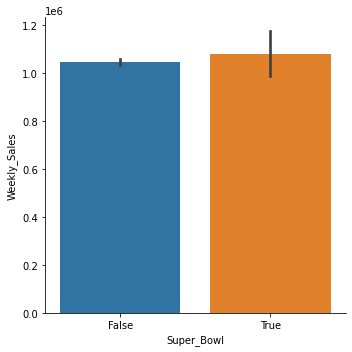

In [ ]:
sns.catplot(x='Super_Bowl', y='Weekly_Sales', data=df,  kind="bar")

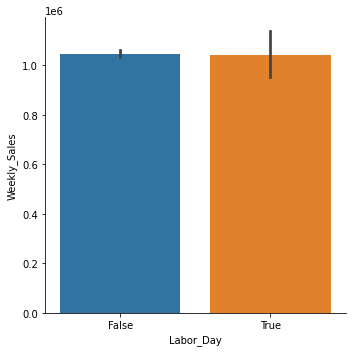

In [ ]:
sns.catplot(x='Labor_Day', y='Weekly_Sales', data=df,  kind="bar")

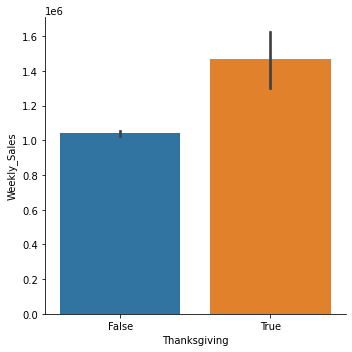

In [ ]:
sns.catplot(x='Thanksgiving', y='Weekly_Sales', data=df,  kind="bar")

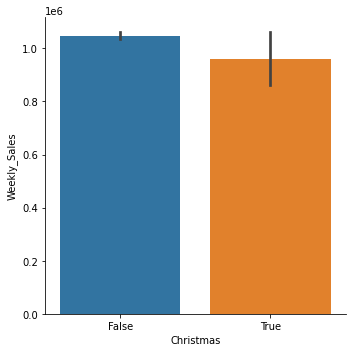

In [ ]:
sns.catplot(x='Christmas', y='Weekly_Sales', data=df, kind="bar")

#Proporcione una vista mensual y semestral de las ventas en unidades y brinde información o comentarios de la gráfica


In [ ]:
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
0      1  1,643,690.90             0        42.31        2.57 211.10   
1      1  1,641,957.44             1        38.51        2.55 211.24   
2      1  1,611,968.17             0        39.93        2.51 211.29   
3      1  1,409,727.59             0        46.63        2.56 211.32   
4      1  1,554,806.68             0        46.50        2.62 211.35   

   Unemployment  Day  Month  Year  
0          8.11    6      5  2010  
1          8.11    3     12  2010  
2          8.11    4      2  2010  
3          8.11    4      2  2010  
4          8.11    0      5  2010

In [ ]:
year_sales = df.groupby('Year')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()
year_sales

Weekly_Sales
Year                 
2011 2,448,200,007.35
2010 2,288,886,120.41
2012 2,000,132,859.35

In [ ]:
fig = px.bar(year_sales,
             title="Ventas Anuales")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
semester= {1:'1er Semestre', 2:'1er Semestre',3:'1er Semestre',4:'1er Semestre',5:'1er Semestre',6:'1er Semestre',7:'2do Semestre',8:'2do Semestre',9:'2do Semestre',10:'2do Semestre',11:'2do Semestre',12:'2do Semestre'}
df['Month']= df['Month'].map(semester)
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
0      1  1,643,690.90             0        42.31        2.57 211.10   
1      1  1,641,957.44             1        38.51        2.55 211.24   
2      1  1,611,968.17             0        39.93        2.51 211.29   
3      1  1,409,727.59             0        46.63        2.56 211.32   
4      1  1,554,806.68             0        46.50        2.62 211.35   

   Unemployment  Day         Month  Year  
0          8.11    6  1er Semestre  2010  
1          8.11    3  2do Semestre  2010  
2          8.11    4  1er Semestre  2010  
3          8.11    4  1er Semestre  2010  
4          8.11    0  1er Semestre  2010

In [ ]:
semester_sales = df.groupby(['Month'])['Weekly_Sales'].sum().to_frame()
sm =semester_sales.rename(columns={'Month':'Semestre'})
sm

Weekly_Sales
Month                        
1er Semestre 3,327,976,803.09
2do Semestre 3,409,242,184.02

In [ ]:
fig = px.bar(semester_sales,
             title="Ventas Semestrales")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
month_sales = df.groupby('Month')['Weekly_Sales'].sum().to_frame()
month_sales

Weekly_Sales
Month               
1     426,426,265.05
2     522,025,682.89
3     553,486,409.57
4     645,323,889.62
5     605,696,592.19
6     575,017,963.77
7     593,313,937.18
8     564,231,699.51
9     590,532,262.85
10    602,918,857.42
11    459,169,335.89
12    599,076,091.17

In [ ]:
months={
1:'Jan',
 2:'Feb',
 3:'Mar',
 4:'Apr',
 5:'May',
 6:'Jun',
7:'Jul',
 8:'Aug',
 9:'Sep',
10:'Oct',
11:'Nov',
 12:'Dec'}
df['Month']= df['Month'].map(months)
df.head(5)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
0      1  1,643,690.90             0        42.31        2.57 211.10   
1      1  1,641,957.44             1        38.51        2.55 211.24   
2      1  1,611,968.17             0        39.93        2.51 211.29   
3      1  1,409,727.59             0        46.63        2.56 211.32   
4      1  1,554,806.68             0        46.50        2.62 211.35   

   Unemployment  Day Month  Year  
0          8.11    6   May  2010  
1          8.11    3   Dec  2010  
2          8.11    4   Feb  2010  
3          8.11    4   Feb  2010  
4          8.11    0   May  2010

In [ ]:
month_with_names_sales = df.groupby('Month',as_index=False)['Weekly_Sales'].sum().sort_values(by = 'Month',ascending=True)
month_with_names_sales

Month   Weekly_Sales
0    Apr 645,323,889.62
1    Aug 564,231,699.51
2    Dec 599,076,091.17
3    Feb 522,025,682.89
4    Jan 426,426,265.05
5    Jul 593,313,937.18
6    Jun 575,017,963.77
7    Mar 553,486,409.57
8    May 605,696,592.19
9    Nov 459,169,335.89
10   Oct 602,918,857.42
11   Sep 590,532,262.85

In [ ]:
fig = px.bar(month_with_names_sales,
             title="Ventas Mensuales")
fig.update_xaxes(type='category')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
month_4_year_sales = df.groupby(['Year','Month'])['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()
month_4_year_sales

Weekly_Sales
Year Month               
2010 12    323,571,609.42
2012 6     292,388,267.49
2010 5     280,611,883.51
2011 4     278,969,312.14
     11    253,470,322.76
2010 10    231,120,142.15
2011 9     231,032,262.85
2012 3     230,739,669.06
2011 12    229,375,967.50
     7     224,461,091.72
     1     211,965,689.75
2012 8     191,612,586.86
2010 2     191,586,880.67
2011 8     188,081,026.65
2012 10    188,079,385.82
2011 2     187,609,203.72
2010 3     186,226,221.18
2012 7     184,586,489.83
2010 8     184,538,086.00
     7     184,266,355.63
     4     183,811,789.47
2011 10    183,719,329.45
     5     182,801,666.84
2012 4     182,542,788.01
     9     179,795,939.27
2010 9     179,704,060.73
2012 1     172,220,699.43
2010 11    158,773,134.14
2012 2     142,829,598.50
2010 6     142,436,081.64
2012 5     142,283,041.84
2011 6     140,193,614.64
     3     136,520,519.33
2012 11     46,925,878.99
     12     46,128,514.25
2010 1      42,239,875.87

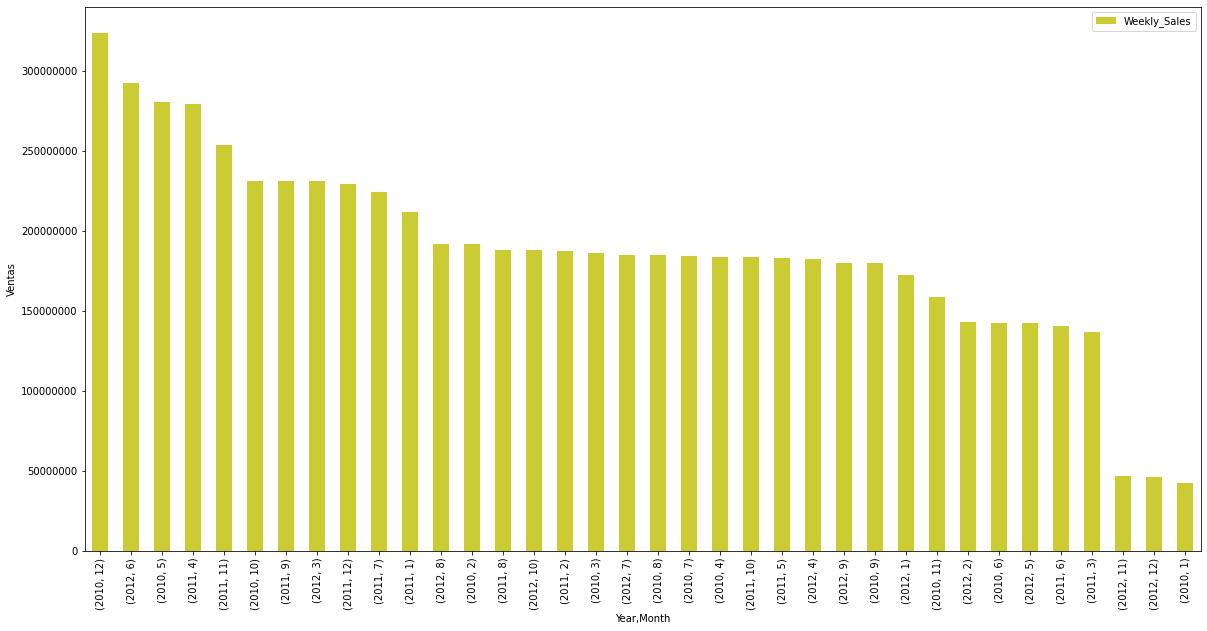

In [ ]:
month_4_year_sales.plot(kind='bar',color='y',alpha=0.8,ylabel='Ventas')
plt.ticklabel_format(useOffset=True, style='plain', axis='y')
plt.gcf().set_size_inches(20, 10)